In [1]:
import sys
import numpy as np
from collections import defaultdict
sys.path.insert(0,'../')
from echosounder_model import EchoDataRaw

/Users/wu-jung/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
a = EchoDataRaw('../testtest.h5')

In [4]:
for p in a.hdf5_handle['transducer00'].items():
    print(p)

('angle_offset_alongship', <HDF5 dataset "angle_offset_alongship": shape (1,), type "<f8">)
('angle_offset_athwart', <HDF5 dataset "angle_offset_athwart": shape (1,), type "<f8">)
('angle_sensitivity_alongship', <HDF5 dataset "angle_sensitivity_alongship": shape (1,), type "<f8">)
('angle_sensitivity_athwartship', <HDF5 dataset "angle_sensitivity_athwartship": shape (1,), type "<f8">)
('beam_type', <HDF5 dataset "beam_type": shape (1,), type "<i8">)
('beam_width_alongship', <HDF5 dataset "beam_width_alongship": shape (1,), type "<f8">)
('beam_width_athwartship', <HDF5 dataset "beam_width_athwartship": shape (1,), type "<f8">)
('channel_id', <HDF5 dataset "channel_id": shape (1,), type "|O">)
('dir_x', <HDF5 dataset "dir_x": shape (1,), type "<f8">)
('dir_y', <HDF5 dataset "dir_y": shape (1,), type "<f8">)
('dir_z', <HDF5 dataset "dir_z": shape (1,), type "<f8">)
('equiv_beam_angle', <HDF5 dataset "equiv_beam_angle": shape (1,), type "<f8">)
('frequency', <HDF5 dataset "frequency": shap

In [7]:
a.hdf5_handle['transducer01']['frequency'][0]

38000.0

In [13]:
for p in a.hdf5_handle['metadata'].items():
    print(p)

('bin_size', <HDF5 dataset "bin_size": shape (1,), type "<f4">)
('zplsc_absorption_coeff', <HDF5 dataset "zplsc_absorption_coeff": shape (3,), type "<f4">)
('zplsc_bandwidth', <HDF5 dataset "zplsc_bandwidth": shape (3,), type "<f4">)
('zplsc_channel', <HDF5 dataset "zplsc_channel": shape (3,), type "<i2">)
('zplsc_frequency', <HDF5 dataset "zplsc_frequency": shape (3,), type "<f4">)
('zplsc_pulse_length', <HDF5 dataset "zplsc_pulse_length": shape (3,), type "<f4">)
('zplsc_sample_interval', <HDF5 dataset "zplsc_sample_interval": shape (3,), type "<f4">)
('zplsc_sound_velocity', <HDF5 dataset "zplsc_sound_velocity": shape (3,), type "<f4">)
('zplsc_temperature', <HDF5 dataset "zplsc_temperature": shape (3,), type "<f4">)
('zplsc_timestamp', <HDF5 dataset "zplsc_timestamp": shape (1,), type "|O">)
('zplsc_transducer_depth', <HDF5 dataset "zplsc_transducer_depth": shape (3,), type "<f4">)
('zplsc_transmit_power', <HDF5 dataset "zplsc_transmit_power": shape (3,), type "<f4">)


In [16]:
a.hdf5_handle['metadata']['zplsc_frequency'][:]

array([120000.,  38000., 200000.], dtype=float32)

In [21]:
a.hdf5_handle['transducer00']['gain'][0]

25.0

In [25]:
a.hdf5_handle['transducer00']['pulse_length_table'][:]

array([6.39999998e-05, 1.28000000e-04, 2.55999999e-04, 5.11999999e-04,
       1.02400000e-03])

In [26]:
a.hdf5_handle['transducer00']['sa_correction_table'][:]

array([0., 0., 0., 0., 0.])

In [4]:
cal_params = a.get_cal_params()

In [5]:
cal_params

defaultdict(list,
            {'120000.0': defaultdict(list,
                         {'absorptioncoefficient': 0.03744031,
                          'equivalentbeamangle': -20.700000762939453,
                          'gain': 25.0,
                          'pulselength': 0.001024,
                          'pulselengthtable': array([6.39999998e-05, 1.28000000e-04, 2.55999999e-04, 5.11999999e-04,
                                 1.02400000e-03]),
                          'sacorrectiontable': array([0., 0., 0., 0., 0.]),
                          'sampleinterval': 0.000256,
                          'soundvelocity': 1493.8888,
                          'transmitpower': 250.0}),
             '200000.0': defaultdict(list,
                         {'absorptioncoefficient': 0.05268759,
                          'equivalentbeamangle': -20.700000762939453,
                          'gain': 25.0,
                          'pulselength': 0.001024,
                          'pulselengthtable'

In [35]:
for p in a.hdf5_handle['power_data'].values():
    print(p.shape)

(1046, 86153)
(1046, 86153)
(1046, 86153)


In [11]:
a.hdf5_handle['transducer00']['frequency']

<HDF5 dataset "frequency": shape (1,), type "<f8">

In [25]:
for p in a.hdf5_handle['power_data'].items():
    print(type(p))

<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


In [26]:
type(a.hdf5_handle['power_data']['120000.0'])

h5py._hl.dataset.Dataset

In [33]:
a.hdf5_handle['power_data']['120000.0'].shape

(1046, 86153)

In [14]:
N = int(np.floor(a.depth_bin/a.bin_size))
for p in a.hdf5_handle['power_data'].values():
    sz = p.shape
    power = np.array(p)
    depth_bin_num = int(np.floor((sz[0]-a.tvg_correction_factor)/N))  # number of depth bins`
    ping_bin_num = int(np.floor(sz[1]/a.ping_bin))                    # number of ping bins
    power_bin = np.empty([depth_bin_num,ping_bin_num])
    for iD in range(depth_bin_num):
        for iP in range(ping_bin_num):
            depth_idx = np.arange(N) + N*iD + a.tvg_correction_factor  # match the 2-sample offset
            ping_idx = np.arange(a.ping_bin) + a.ping_bin*iP            
            power_bin[iD,iP] = np.mean(10**(power[np.ix_(depth_idx,ping_idx)]/10))


In [9]:
depth_idx

array([1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026,
       1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037,
       1038, 1039, 1040, 1041])

In [10]:
ping_idx

array([86080, 86081, 86082, 86083, 86084, 86085, 86086, 86087, 86088,
       86089, 86090, 86091, 86092, 86093, 86094, 86095, 86096, 86097,
       86098, 86099, 86100, 86101, 86102, 86103, 86104, 86105, 86106,
       86107, 86108, 86109, 86110, 86111, 86112, 86113, 86114, 86115,
       86116, 86117, 86118, 86119])

In [26]:
sz = a.hdf5_handle['power_data']['38000.0'].shape
sz

(1046, 86153)

In [17]:
depth_bin_num,ping_bin_num

(40, 2153)

In [28]:
for p in a.hdf5_handle['power_data'].items():
    print(p)

('120000.0', <HDF5 dataset "120000.0": shape (1046, 86153), type "<f8">)
('200000.0', <HDF5 dataset "200000.0": shape (1046, 86153), type "<f8">)
('38000.0', <HDF5 dataset "38000.0": shape (1046, 86153), type "<f8">)


In [29]:
a.hdf5_handle['power_data']

<HDF5 group "/power_data" (3 members)>

In [7]:
for (names,vals) in a.cal_params.items():
    print(names)

120000.0
38000.0
200000.0


In [16]:
type(a.hdf5_handle['power_data'][names][:])

numpy.ndarray

In [19]:
for (names,vals) in a.hdf5_handle['power_data'].items():
    print(type(vals[:]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
a=np.array(1)
a.shape==()

True

In [6]:
a.get_noise()

In [7]:
a.noise_est

defaultdict(list,
            {'120000.0': array([1.69691799e-13, 1.84288191e-13, 1.73193825e-13, ...,
                    4.36547497e-13, 4.52334649e-13, 5.11540084e-13]),
             '200000.0': array([1.09200562e-14, 1.14533833e-14, 1.18923434e-14, ...,
                    3.20477269e-14, 2.95982096e-14, 3.18462643e-14]),
             '38000.0': array([5.40234022e-12, 5.22732079e-12, 5.15466352e-12, ...,
                    1.08604059e-11, 1.15177274e-11, 1.23418264e-11])})

In [3]:
a.remove_noise()

../echosounder_model.py:188: RuntimeWarning: invalid value encountered in log10
  tmp = 10*np.log10(np.ma.masked_less_equal(subtract,0))


In [ ]:
a.noise_est

In [3]:
import matplotlib.pyplot as plt

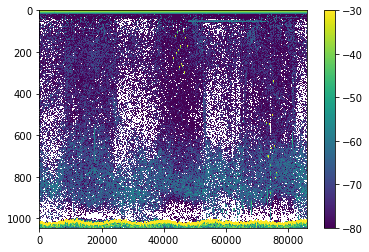

In [16]:
plt.imshow(a.Sv_corrected['38000.0'],aspect='auto',vmax=-30,vmin=-80)
plt.colorbar()
plt.show()

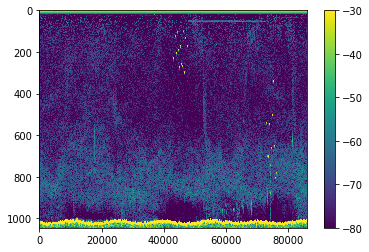

In [17]:
plt.imshow(a.Sv_raw['38000.0'],aspect='auto',vmax=-30,vmin=-80)
plt.colorbar()
plt.show()

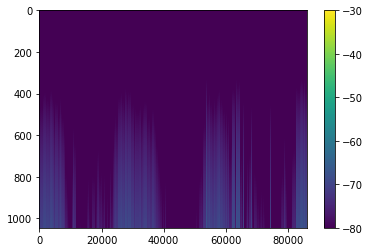

In [18]:
plt.imshow(a.Sv_noise['38000.0'],aspect='auto',vmax=-30,vmin=-80)
plt.colorbar()
plt.show()

In [16]:
for p in a.hdf5_handle.items():
    print(p)

('header', <HDF5 group "/header" (5 members)>)
('metadata', <HDF5 group "/metadata" (12 members)>)
('ping_time', <HDF5 dataset "ping_time": shape (86153,), type "<f8">)
('power_data', <HDF5 group "/power_data" (3 members)>)
('transducer00', <HDF5 group "/transducer00" (21 members)>)
('transducer01', <HDF5 group "/transducer01" (21 members)>)
('transducer02', <HDF5 group "/transducer02" (21 members)>)


In [6]:
a.Sv_raw

array([[-153.41424662, -119.9952135 , -115.12699404, ..., -129.95507313,
        -112.95158197, -115.58559443],
       [-145.81794282, -125.40434624, -125.48665913, ..., -125.42786421,
        -125.46314116, -125.45138218],
       [-145.72387095, -125.42786421, -125.47490014, ..., -125.45138218,
        -125.45138218, -125.43962319],
       ...,
       [ -82.43735474,  -49.37109115,  -65.76311513, ...,  -60.09528475,
         -71.21928381,  -51.52298526],
       [ -69.39166983,  -50.25980252,  -58.9144149 , ...,  -69.90906513,
         -58.30294772,  -55.29264776],
       [ -71.82081613,  -55.28768434,  -50.63112659, ...,  -55.82859761,
         -53.57087264,  -53.71198045]])

In [7]:
a.Sv_noise

array([[-124.99611357, -124.99611357, -124.99611357, ...,    0.        ,
           0.        ,    0.        ],
       [-124.99611357, -124.99611357, -124.99611357, ...,    0.        ,
           0.        ,    0.        ],
       [-124.99611357, -124.99611357, -124.99611357, ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [ -58.04079429,  -58.04079429,  -58.04079429, ...,    0.        ,
           0.        ,    0.        ],
       [ -58.0123049 ,  -58.0123049 ,  -58.0123049 , ...,    0.        ,
           0.        ,    0.        ],
       [ -57.9838235 ,  -57.9838235 ,  -57.9838235 , ...,    0.        ,
           0.        ,    0.        ]])

In [10]:
range_corrected

array([  0.        ,   0.        ,   0.        , ..., 199.05769359,
       199.24891135, 199.44012912])

In [11]:
ABS

array([ 0.        ,  0.        ,  0.        , ..., 20.97573993,
       20.99588953, 21.01603914])

In [3]:
a.remove_noise()

../echosounder_model.py:188: RuntimeWarning: invalid value encountered in log10
  tmp = 10*np.log10(np.ma.masked_less_equal(subtract,0))


In [7]:
import datetime as dt

In [8]:
date_start = dt.date(2015,9,2)
date_end = dt.date(2015,9,4)
date_wanted = [(date_start+dt.timedelta(days=xx)).strftime('%Y%m%d') for xx in range((date_end-date_start).days + 1)]

In [9]:
len(date_wanted)

3

In [10]:
subset_params_names = ["hour_all","min_all","sec_all"]
subset_params_vals = (range(24),range(20),range(0,60,10))
subset_params = dict(zip(subset_params_names,subset_params_vals))
ping_per_day = len(subset_params['hour_all'])*len(subset_params['min_all'])*len(subset_params['sec_all'])

In [11]:
ping_per_day

2880

In [12]:
a.subset_data(date_wanted,subset_params)

In [4]:
a.get_mvbs()

In [5]:
MVBS_filepath = 'testtest_MVBS11.h5'

In [6]:
a.save_mvbs2hdf5(MVBS_filepath)

In [17]:
type(a.filepath)

str

In [7]:
import h5py

In [8]:
fh = h5py.File(MVBS_filepath,'r')  # create file, fail if exists

In [11]:
for p in fh['cal_params']['120000.0'].items():
    print(p)

('absorptioncoefficient', <HDF5 dataset "absorptioncoefficient": shape (1,), type "<f4">)
('equivalentbeamangle', <HDF5 dataset "equivalentbeamangle": shape (1,), type "<f8">)
('frequency', <HDF5 dataset "frequency": shape (1,), type "<f8">)
('gain', <HDF5 dataset "gain": shape (1,), type "<f8">)
('pulselength', <HDF5 dataset "pulselength": shape (1,), type "<f4">)
('sampleinterval', <HDF5 dataset "sampleinterval": shape (1,), type "<f4">)
('soundvelocity', <HDF5 dataset "soundvelocity": shape (1,), type "<f4">)
('transmitpower', <HDF5 dataset "transmitpower": shape (1,), type "<f4">)


In [35]:
fh['cal_params']

<HDF5 group "/cal_params" (1 members)>

In [36]:
val = (a.cal_params['120000.0']['absorptioncoefficient'])

AttributeError: 'int' object has no attribute 'cal_params'

In [28]:
isinstance(val,(np.generic,np.ndarray,int,float)) and val.shape[0]==1

False

In [25]:
isinstance(val,(np.generic,np.ndarray)) and 

True

In [37]:
val=np.array(1)

In [39]:
isinstance(val,(np.generic,np.ndarray,int,float))

True

In [42]:
val.shape

()

In [27]:
a.shape

AttributeError: 'int' object has no attribute 'shape'

In [8]:
MF_COLORS.shape[0]

8

In [30]:
from importlib import reload

In [31]:
import echosounder_model

In [32]:
reload(echosounder_model)

<module 'echosounder_model' from '../echosounder_model.py'>

In [33]:
from echosounder_model import EchoDataRaw

In [49]:
a.mvbs2hdf5_inititate('testtest_MVBS3.h5')

ValueError: Shape tuple is incompatible with data

In [43]:
a.MVBS_ping_time.shape

(216,)

In [45]:
a.MVBS['200000.0'].shape

(40, 216)

In [27]:
type(a)

echosounder_model.EchoDataRaw

In [12]:
a.Sv_corrected['120000.0'].shape

(1046, 8640)

In [19]:
def find_nearest_time_idx(all_timestamp_num,time_wanted,tolerance):
    '''
    Function to find nearest element
    time_wanted is a datetime object
    tolerance is the max tolerance in second allowed between `time_wanted` and `all_timestamp`
    all_timestamp_num is a numerical date object (i.e., output from `date2num`)
    '''
    time_wanted_num = date2num(time_wanted)
    idx = np.searchsorted(all_timestamp_num, time_wanted_num, side="left")
    if idx > 0 and (idx == len(all_timestamp_num) or \
        np.abs(time_wanted_num - all_timestamp_num[idx-1]) < np.abs(time_wanted_num - all_timestamp_num[idx])):
        idx -= 1

    # If interval between the selected index and time wanted > `tolerance` seconds
    sec_diff = dt.timedelta(all_timestamp_num[idx]-time_wanted_num).total_seconds()
    if np.abs(sec_diff)>tolerance:
        return np.nan
    else:
        return idx

In [21]:
# total number of subsetted pings per day
ping_per_day = len(subset_params['hour_all'])*\
               len(subset_params['min_all'])*\
               len(subset_params['sec_all'])
subset_ping_time = np.empty((ping_per_day*len(date_wanted),))
subset_Sv_raw = defaultdict(list)
subset_Sv_corrected = defaultdict(list)
subset_Sv_noise = defaultdict(list)
for (freq_str,vals) in a.hdf5_handle['power_data'].items():  # loop through all transducers
    sz = vals.shape
    subset_Sv_raw[freq_str] = np.ma.empty((sz[0],ping_per_day*len(date_wanted)))
    subset_Sv_corrected[freq_str] = np.ma.empty((sz[0],ping_per_day*len(date_wanted)))
    subset_Sv_noise[freq_str] = np.ma.empty((sz[0],ping_per_day*len(date_wanted)))

    for iD,dd_curr in zip(range(len(date_wanted)),date_wanted):  # loop through all dates wanted
        # set up indexing to get wanted pings
        dd = dt.datetime.strptime(dd_curr,'%Y%m%d')
        time_wanted = [dt.datetime(dd.year,dd.month,dd.day,hh,mm,ss) \
                       for hh in subset_params['hour_all']\
                       for mm in subset_params['min_all'] \
                       for ss in subset_params['sec_all']]

        # ping sequence index in subsetted data
        ping_idx = iD*ping_per_day + np.arange(ping_per_day)
        subset_ping_time[ping_idx] = date2num(time_wanted)   # fill in subsetted ping_time

        # fine closest ping index in raw data
        idx_wanted = [find_nearest_time_idx(a.hdf5_handle['ping_time'],tt,2) for tt in time_wanted]
        notnanidx = np.argwhere(~np.isnan(idx_wanted)).flatten()
        notnanidx_in_all = np.array(idx_wanted)[notnanidx].astype(int)

        # fill in Sv values
        notnanidx = notnanidx + iD*ping_per_day   # adjust to global index in subsetted data
        subset_Sv_raw[freq_str][:,notnanidx]       = a.Sv_raw[freq_str][:,notnanidx_in_all]
        subset_Sv_corrected[freq_str][:,notnanidx] = a.Sv_corrected[freq_str][:,notnanidx_in_all]
        subset_Sv_noise[freq_str][:,notnanidx]     = a.Sv_noise[freq_str][:,notnanidx_in_all]

        idx_save_mask = np.argwhere(np.isnan(idx_wanted)) + iD*ping_per_day   # adjust to global index in subsetted data
        subset_Sv_raw[freq_str][:,idx_save_mask]       = np.ma.masked
        subset_Sv_corrected[freq_str][:,idx_save_mask] = np.ma.masked
        subset_Sv_noise[freq_str][:,idx_save_mask]     = np.ma.masked


In [14]:
import matplotlib.pyplot as plt

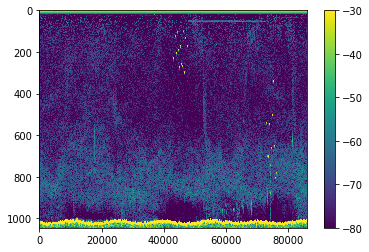

In [23]:
plt.imshow(a.Sv_raw['38000.0'],aspect='auto',vmax=-30,vmin=-80)
plt.colorbar()
plt.show()

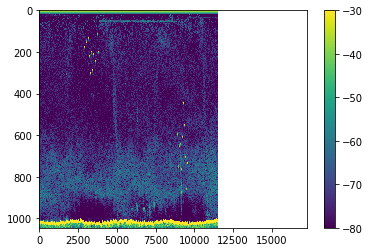

In [24]:
plt.imshow(subset_Sv_raw['38000.0'],aspect='auto',vmax=-30,vmin=-80)
plt.colorbar()
plt.show()

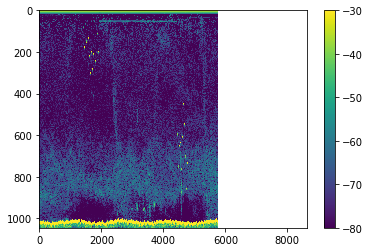

In [16]:
plt.imshow(a.Sv_raw['38000.0'],aspect='auto',vmax=-30,vmin=-80)
plt.colorbar()
plt.show()

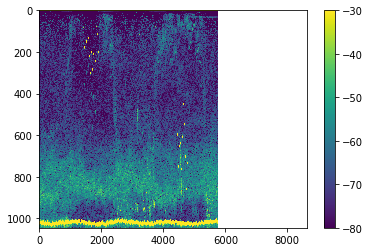

In [18]:
plt.imshow(a.Sv_raw['120000.0'],aspect='auto',vmax=-30,vmin=-80)
plt.colorbar()
plt.show()

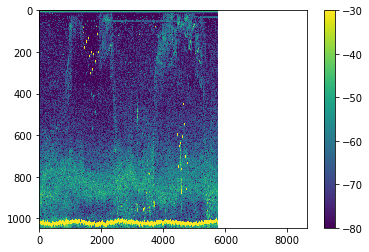

In [19]:
plt.imshow(a.Sv_raw['200000.0'],aspect='auto',vmax=-30,vmin=-80)
plt.colorbar()
plt.show()

In [53]:
MVBS = defaultdict(list)
for (freq_str,vals) in a.hdf5_handle['power_data'].items():
    Sv = a.Sv_corrected[freq_str]
    sz = Sv.shape
    depth_bin_num = int(np.floor(sz[0]/N))
    ping_bin_num = int(np.floor(sz[1]/a.ping_bin))
    MVBS_tmp = np.ma.empty([depth_bin_num,ping_bin_num])
    for iD in range(depth_bin_num):
        for iP in range(ping_bin_num):
            depth_idx = np.arange(N) + N*iD
            ping_idx = np.arange(a.ping_bin) + a.ping_bin*iP
            MVBS_tmp[iD,iP] = 10*np.log10( np.mean(10**(Sv[np.ix_(depth_idx,ping_idx)]/10)) )
    MVBS[freq_str] = MVBS_tmp


/Users/wu-jung/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


In [39]:
iD,iP

(0, 144)

In [38]:
depth_bin_num,ping_bin_num

(40, 216)

In [45]:
MVBS_tmp3.shape

(40, 216)

In [49]:
# 10*np.log10( np.nanmean(10**(Sv[np.ix_(depth_idx,ping_idx)]/10)) )
np.mean(10**(Sv[np.ix_(depth_idx,ping_idx)]/10))

masked

In [17]:
import matplotlib.pyplot as plt

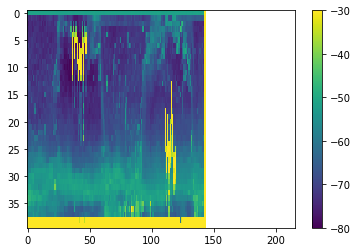

In [18]:
plt.imshow(a.MVBS['200000.0'],aspect='auto',vmax=-30,vmin=-80)
plt.colorbar()
plt.show()

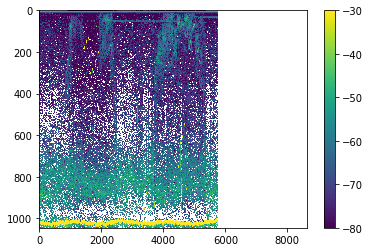

In [19]:
plt.imshow(a.Sv_corrected['200000.0'],aspect='auto',vmax=-30,vmin=-80)
plt.colorbar()
plt.show()

In [56]:
a.hdf5_handle['ping_time'][:]

array([735842.00000095, 735842.00002415, 735842.00003576, ...,
       735844.97219581, 735844.97220743, 735844.97221904])

In [57]:
np.arange(ping_bin_num)*a.ping_bin

array([   0,   40,   80,  120,  160,  200,  240,  280,  320,  360,  400,
        440,  480,  520,  560,  600,  640,  680,  720,  760,  800,  840,
        880,  920,  960, 1000, 1040, 1080, 1120, 1160, 1200, 1240, 1280,
       1320, 1360, 1400, 1440, 1480, 1520, 1560, 1600, 1640, 1680, 1720,
       1760, 1800, 1840, 1880, 1920, 1960, 2000, 2040, 2080, 2120, 2160,
       2200, 2240, 2280, 2320, 2360, 2400, 2440, 2480, 2520, 2560, 2600,
       2640, 2680, 2720, 2760, 2800, 2840, 2880, 2920, 2960, 3000, 3040,
       3080, 3120, 3160, 3200, 3240, 3280, 3320, 3360, 3400, 3440, 3480,
       3520, 3560, 3600, 3640, 3680, 3720, 3760, 3800, 3840, 3880, 3920,
       3960, 4000, 4040, 4080, 4120, 4160, 4200, 4240, 4280, 4320, 4360,
       4400, 4440, 4480, 4520, 4560, 4600, 4640, 4680, 4720, 4760, 4800,
       4840, 4880, 4920, 4960, 5000, 5040, 5080, 5120, 5160, 5200, 5240,
       5280, 5320, 5360, 5400, 5440, 5480, 5520, 5560, 5600, 5640, 5680,
       5720, 5760, 5800, 5840, 5880, 5920, 5960, 60

In [62]:
for names,vals in MVBS.items():
    print(type(vals))

<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>
<class 'numpy.ma.core.MaskedArray'>


In [63]:
a.cal_params

defaultdict(list,
            {'120000.0': defaultdict(list,
                         {'absorptioncoefficient': 0.03744031,
                          'equivalentbeamangle': -20.700000762939453,
                          'frequency': 120000.0,
                          'gain': 25.0,
                          'pulselength': 0.001024,
                          'pulselengthtable': array([6.39999998e-05, 1.28000000e-04, 2.55999999e-04, 5.11999999e-04,
                                 1.02400000e-03]),
                          'sacorrectiontable': array([0., 0., 0., 0., 0.]),
                          'sampleinterval': 0.000256,
                          'soundvelocity': 1493.8888,
                          'transmitpower': 250.0}),
             '200000.0': defaultdict(list,
                         {'absorptioncoefficient': 0.05268759,
                          'equivalentbeamangle': -20.700000762939453,
                          'frequency': 200000.0,
                          'gain': 25.

In [70]:
for freq_str,vals in a.cal_params.items():
    for m,mvals in vals.items():
        print(m,mvals)

frequency 120000.0
soundvelocity 1493.8888
sampleinterval 0.000256
absorptioncoefficient 0.03744031
gain 25.0
equivalentbeamangle -20.700000762939453
transmitpower 250.0
pulselength 0.001024
pulselengthtable [6.39999998e-05 1.28000000e-04 2.55999999e-04 5.11999999e-04
 1.02400000e-03]
sacorrectiontable [0. 0. 0. 0. 0.]
frequency 38000.0
soundvelocity 1493.8888
sampleinterval 0.000256
absorptioncoefficient 0.009785269
gain 26.5
equivalentbeamangle -20.600000381469727
transmitpower 500.0
pulselength 0.001024
pulselengthtable [0.000256 0.000512 0.001024 0.002048 0.004096]
sacorrectiontable [0. 0. 0. 0. 0.]
frequency 200000.0
soundvelocity 1493.8888
sampleinterval 0.000256
absorptioncoefficient 0.05268759
gain 25.0
equivalentbeamangle -20.700000762939453
transmitpower 150.0
pulselength 0.001024
pulselengthtable [6.39999998e-05 1.28000000e-04 2.55999999e-04 5.11999999e-04
 1.02400000e-03]
sacorrectiontable [0. 0. 0. 0. 0.]


In [71]:
from unpack_ek60 import save_metadata

In [ ]:
for freq_str,vals in a.cal_params.items():
    for m,mvals in vals.items():
        print(m,mvals)